## **Used Car Price Prediction - Prediction Phase**

### **1. Introduction**

### **1. Import Libraries**

In [101]:
#Data Processing
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pyl

#Set-up Visualization settings
%matplotlib inline 

import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,r2_score
from sklearn.model_selection import cross_val_score,KFold,train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression,chi2
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

print('scikit-learn version:', sk.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

scikit-learn version: 0.23.2
numpy version: 1.19.2
matplotlib version: 3.3.2


### **Attribute Information**

Acronym | Description
---|---
Brand | Brand of the car
Year | Model year of the car
Price | Price of the car in £
Transmission | The transmission allows the vehicle to change gears, thereby transferring power from the engine to the drive axle in the most efficient way possible.
Mile Age | A number of miles travelled or covered 
Fuel Type | The type of fuel the vehicle uses
Tax | is a tax which has to be paid on, or included with, a wheeled vehicle to use it on a public road.
Mpg | Mpg stands for miles per gallon, and is used to show how far your car is able to travel for every gallon (or 4.55 litres)
Engine Size| Measurement of the total volume of the cylinders in the engine

### **2. Read Data**

In [102]:
df_final = pd.read_csv("car_dataset.csv",skipinitialspace=True)

In [103]:
df_final.head(10)

,brand,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,4,2017,12500,0,15735.0,0,150.0,55.4,1.4
1,4,2016,16500,2,36203.0,1,20.0,64.2,2.0
2,4,2016,11000,0,29946.0,0,30.0,55.4,1.4
3,4,2017,16800,2,25952.0,1,145.0,67.3,2.0
4,4,2019,17300,0,1998.0,0,145.0,49.6,1.0
5,4,2016,13900,2,32260.0,0,30.0,58.9,1.4
6,4,2015,10200,0,46112.0,0,20.0,60.1,1.4
7,4,2016,12000,0,22451.0,0,30.0,55.4,1.4
8,4,2017,16100,0,28955.0,0,145.0,58.9,1.4
9,4,2016,16500,2,52198.0,1,125.0,57.6,2.0


### **3. Pre-processing for modeling**

#### **3.1 Feature Scaling**

Gradient Descent Based Algorithms such as  linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. Furthermore, tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Because one of the ml algorithms that I am going to use is Linear Regression, I will scale my data. In addition, I also tried to use normalization to check the performance of the algorithms, and I got slightly lower results.

In [86]:
std = StandardScaler()
df_final_scaled = std.fit_transform(df_final)
df_final_scaled = pd.DataFrame(df_final_scaled, columns = df_final.columns)
print(df_final_scaled.shape)
df_final_scaled.head()

(85546, 9)


,brand,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.574214,-0.151788,-0.497323,-0.771280,-0.309838,-0.814601,0.538216,0.019852,-0.446161
1,0.574214,-0.743922,0.062567,1.774488,0.963397,0.982956,-1.684765,0.858061,0.834663
2,0.574214,-0.743922,-0.707282,-0.771280,0.574173,-0.814601,-1.513767,0.019852,-0.446161
3,0.574214,-0.151788,0.104559,1.774488,0.325722,0.982956,0.452717,1.153339,0.834663
4,0.574214,1.032478,0.174545,-0.771280,-1.164364,-0.814601,0.452717,-0.532604,-1.300044


In [104]:
X= df_final_scaled.drop(["price"],axis =1)
y =df_final_scaled["price"]

#### **3.2 Splitting Into Train and Test**

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#### **3.3 Selecting the best features for the regression with SelectKBest, f_regression**

Feature selection is a method where we choose those features in our data that correlated most with the target variable. Meaning, we choose the best predictors for the target variable. I am going to use SelectKBest from scikit-learn to find out best features to train the model.

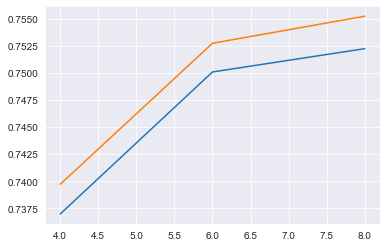

In [106]:
column_names = df_final.drop(columns = ['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range(4, 9, 2): 
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')
plt.show()

We can see that we got the highest score when we have 8 features.Therefore, I will be taking k as 8.

In [107]:
selector = SelectKBest(f_regression, k = 8)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]

Index(['brand', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

We will be using the features above when building our model.

### **4. Predictions**

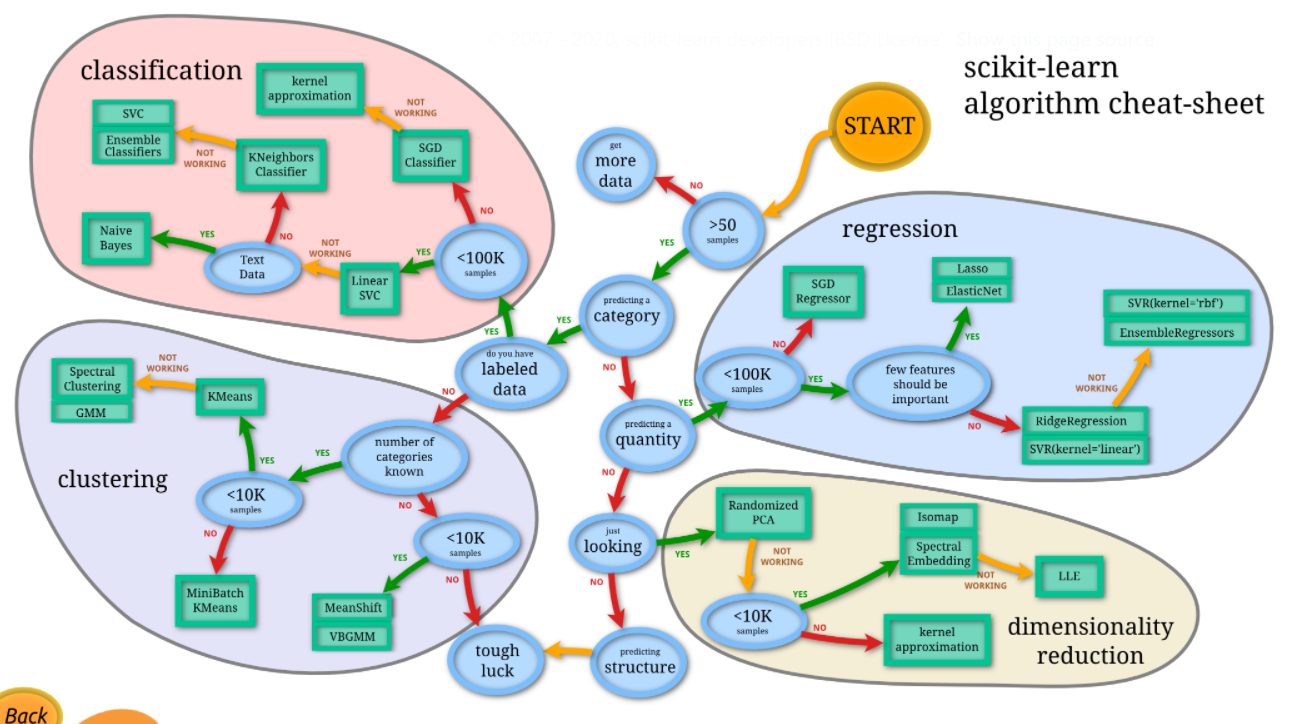

If we follow cheat-sheet provided by scikit-learn, we will end up with algorithms such as Lasso,ElasticNet,Linear Regression,Ridge Regression and SVR. In this notebook, I will try 4 different ML algorithms which are:
- Linear Regression
- Lasso
- DecisionTree Regression
- RandomForest Regression

Although DecisionTree and Randomforest popular in classifications problems, they can also perform good in regression challenges as well. Moreover, I am going to use grid search in order to get the best hyperparameters for different algorithms.

#### **4.1 DecisionTree Regression using GridSearch with Cross Validation**

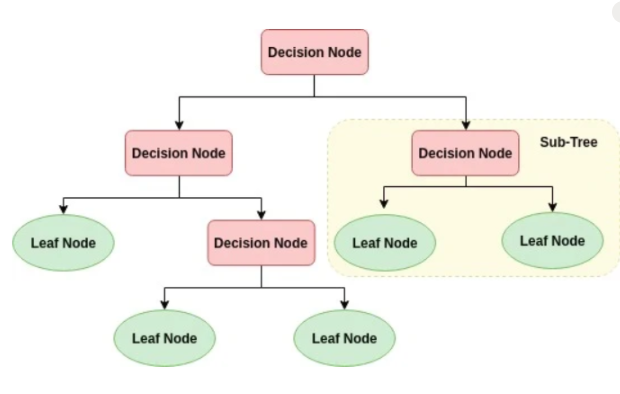

Decision trees are simple to implement and equally easy to understand. It is a supervised machine learning technique that is used both for classification and regression. Here is some explanation of some of the parameters that we used:


- Criterion: According to scikit, it is "The function to measure the quality of a split". Computationally, entropy is more complex since it makes use of logarithms and overall, the calculation of the Gini Index will be faster.
Researches point out that in most of the cases, the choice of splitting criteria will not make much difference in the tree performance. Therefore, we can use gini because it can perform faster.

- Max Depth: According to scikit, max depth is "The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples". If we have increase max depth, our tree will be more complicated because we will have more splits. It also can cause overfitting of the data and will not be able to generalize well on test set. Underfitting can also cause problems. Therefore, we need to test different scenario to find out best results.

- Splitter: The strategy used to choose the split at each node. There are 2 different splitters namely, "random" and "best". "Best"
 splitter will calculate the best features to split based on the impurity measure and use that to split the nodes. On the other hand in "Random"we can have a high chance of ending up with features that don’t really give much information therefore, accuracy might be less. Furthermore, "Random" can helps us to prevent overfitting because it selects a set of features randomly and splits. Moreover, it is also need less computation.


Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 100, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 1, 'splitter': 'random'}
R2 Score: 0.9211821040642386


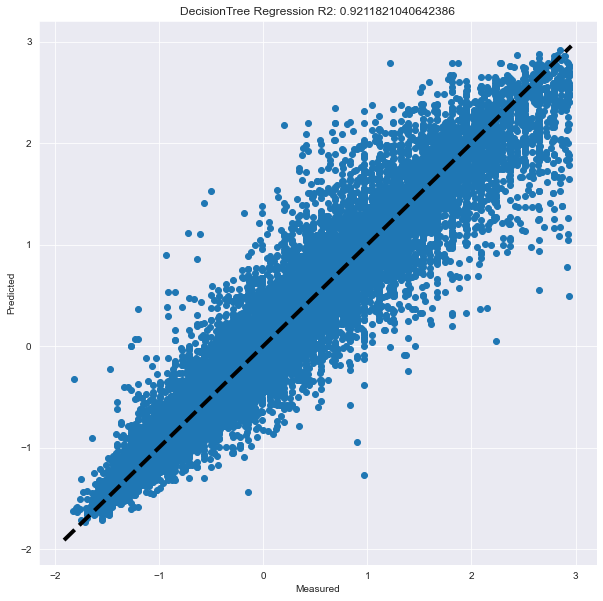

In [91]:
DT_criterion= ["mse","poisson","friedman_mse"]
DT_max_depth =[10,100]
DT_splitter=["random","best"]
DT_min_samples_split=[2,3]
DT_min_samples_leaf=[2,3]
DT_random_state=[0,1]
scoring=["r2"]

param_grid = dict(criterion=DT_criterion,max_depth=DT_max_depth,splitter=DT_splitter,min_samples_split=DT_min_samples_split,min_samples_leaf=DT_min_samples_leaf,random_state=DT_random_state)
clf_dt = GridSearchCV(DecisionTreeRegressor(),param_grid,cv =5,scoring=scoring,refit="r2")
clf_dt.fit(X_train_transformed,y_train)
dt_best_params =clf_dt.best_params_
print("Best Parameters: " + str(clf_dt.best_params_))
print("R2 Score: " + str(clf_dt.best_score_))

y_pred = clf_dt.best_estimator_.predict(X_test_transformed)
r2_score = r2_score(y_test, y_pred)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set(title=f'DecisionTree Regression R2: {clf_dt.best_score_}')
plt.show()

#### **4.2 RandomForest Regression using GridSearch with Cross Validation**

The random forest creates multiple decision trees and combines them to get a more accurate and stable prediction. The variety is what makes random forests more effective than individual decision trees.

A big advantage of the random forest is that it can be used for both classification and regression problems that make up most of the current machine learning systems. Since classification is sometimes considered the building block of machine learning,
we'll also apply the algorithm.

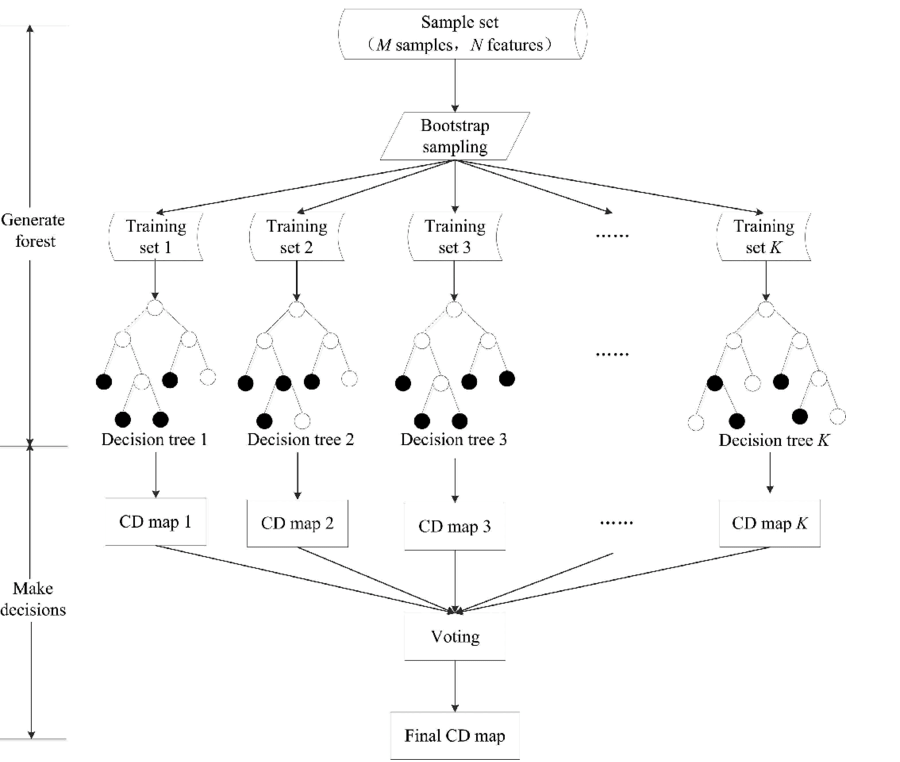

The Random Forest algorithm consists of two stages, one is the creation of a Random Forest, the other is to make predictions through the Random Forest regression. Here is some explanation of some of the parameters that we used:

- n_estimators: number of trees in the forest. We will assign 10,50 also 100 to observe effects on accuracy.
- max_depth: max number of levels in each decision tree. we will assign 10,50 also 100 and observe effects on accuracy.
- criterion: According to scikit, the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. We will try both respectively and observe possible effects on accuracy.

Best Parameters: {'criterion': 'mse', 'max_depth': 100, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
R2 Score: 0.9380803173136366


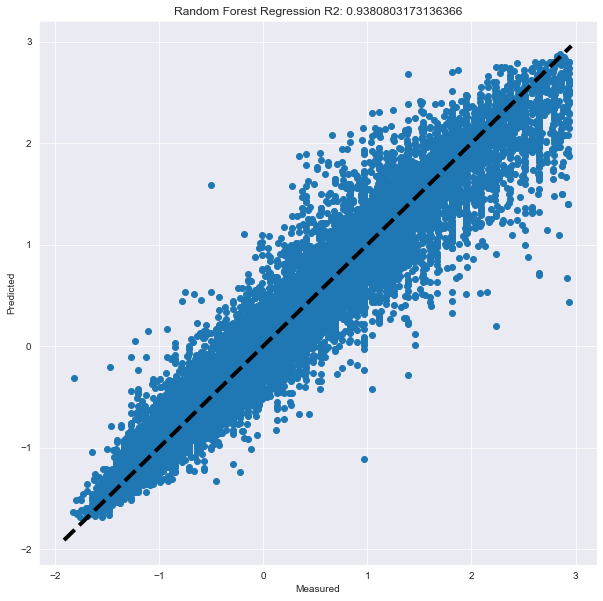

In [92]:
RF_criterion= ["mse"]
RF_n_estimators =[10,100]
RF_n_max_depth =[10,100]
RF_min_samples_split=[2,3]
RF_min_samples_leaf=[2,3]
scoring=["r2"]

param_grid= dict(criterion=RF_criterion,n_estimators=RF_n_estimators,max_depth=RF_n_max_depth,min_samples_split=RF_min_samples_split,min_samples_leaf=RF_min_samples_leaf)
clf_rf= GridSearchCV(RandomForestRegressor(),param_grid,cv =5,scoring=scoring,refit="r2")
clf_rf.fit(X_train_transformed, y_train)
print("Best Parameters: " + str(clf_rf.best_params_))
print("R2 Score: " + str(clf_rf.best_score_))
y_pred = clf_rf.best_estimator_.predict(X_test_transformed)


fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set(title=f'Random Forest Regression R2: {clf_rf.best_score_}')
plt.show()

#### **4.3 Linear Regression using GridSearch with Cross Validation**

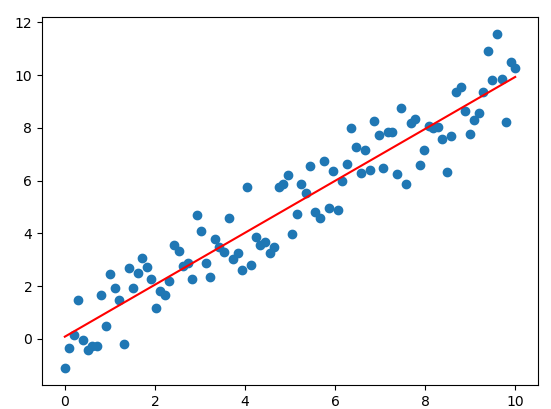

Linear regression is a basic and popular type of predictive analysis. It is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). Here is some explanation of some of the parameters that we used:
 - N_jobs: According to the scikit-learn it is the number of jobs to use for the computation. if it is bigger than 1, it will provide speedup
 - Normalize: If True, the regressors X will be normalized before regression

Best Parameters: {'n_jobs': 1, 'normalize': True}
R2 Score: 0.7520964536086595


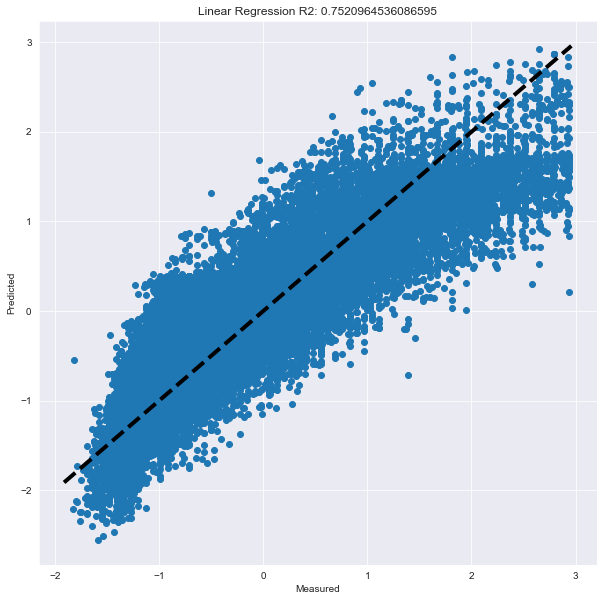

In [93]:
LR_n_jobs =[1,10,100,None]
LR_normalize =[True,False]
scoring=["r2"]

param_grid= dict(n_jobs=LR_n_jobs,normalize=LR_normalize)
clf_lr = GridSearchCV(LinearRegression(),param_grid,cv =5,scoring=scoring,refit="r2")
clf_lr.fit(X_train_transformed, y_train)
print("Best Parameters: " + str(clf_lr.best_params_))
print("R2 Score: " + str(clf_lr.best_score_))

y_pred = clf_lr.predict(X_test_transformed)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set(title=f'Linear Regression R2: {clf_lr.best_score_}')
plt.show()


#### **4.4 Lasso Regression using GridSearch with Cross Validation**

Lasso regression is a type of linear regression. It uses shrinkage technique that where data values are shrunk towards a central point, like the mean. Furthermore, it is a statistical formula whose main purpose is the feature selection and regularization of data models.  The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.

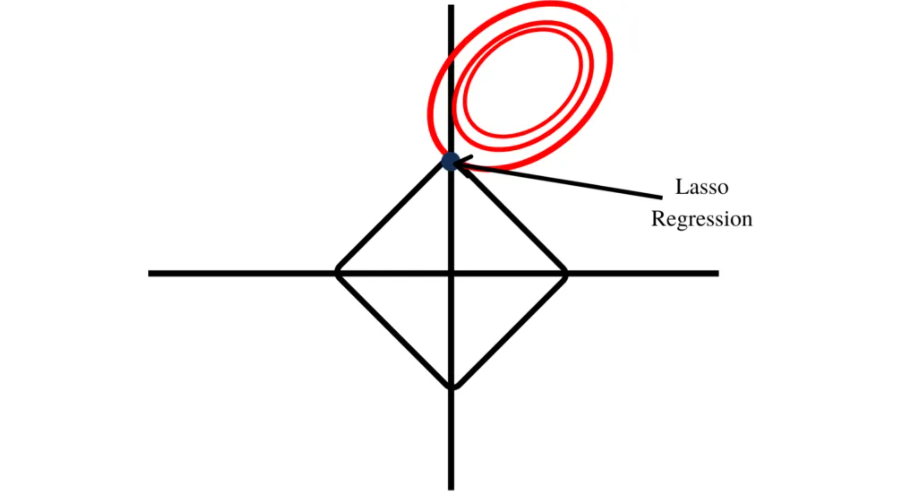

Best Parameters: {'alpha': 0.0001, 'max_iter': 100, 'normalize': False}
R2 Score: 0.752096363935429


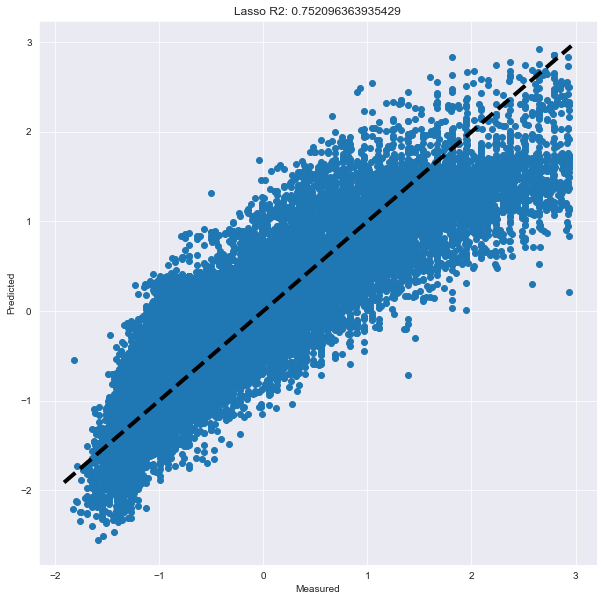

In [96]:
from sklearn.linear_model import Lasso

L_alpha= [0.0001,0.01,0.001,0.1,0.3,1]
L_max_iter =[1,10,100,1000,10000,100000]
L_normalize =[True,False]
scoring=["r2"]

param_grid= dict(alpha=L_alpha,max_iter=L_max_iter,normalize=L_normalize)
clf_l = GridSearchCV(Lasso(),param_grid,cv =5,scoring=scoring,refit="r2")
clf_l.fit(X_train_transformed, y_train)
print("Best Parameters: " + str(clf_l.best_params_))
print("R2 Score: " + str(clf_l.best_score_))
y_pred = clf_l.best_estimator_.predict(X_test_transformed)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set(title=f'Lasso R2: {clf_l.best_score_}')
plt.show()

### **5. Test Real World Scenario**

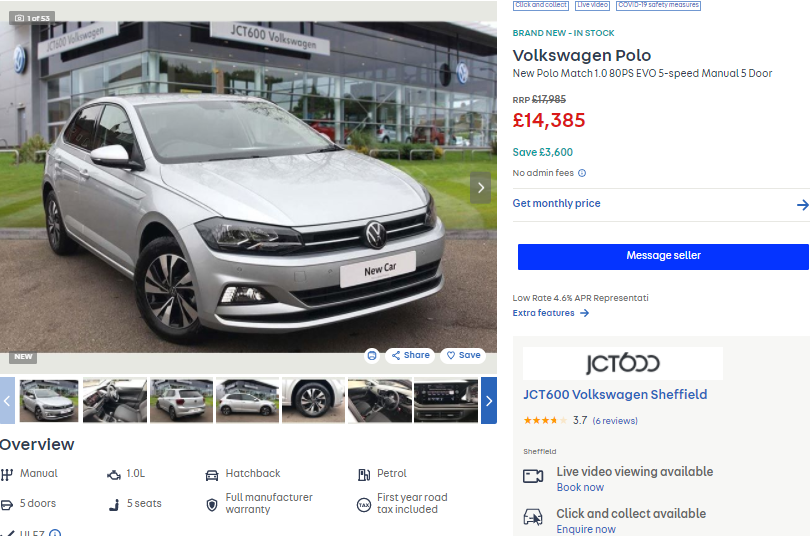

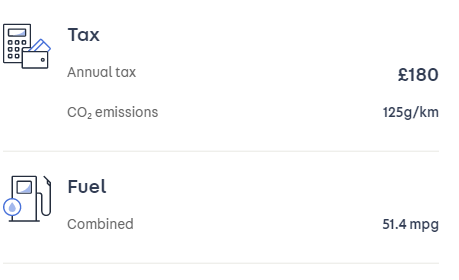

The example car that I choose can be seen from above. The specifications of the car can be seen
- Transmission: Manual
- Fuel Type: Petrol
- Mpg: Average of 52
- Brand: Volswagen
- Road Tax: 180
- Mileage: New
- Engine Size: 1.0
- Year: 2020

Because we had better results in RandomForest Regression, I am going to use this ML algorithm

#### **5.1 DecisionTree Regression**

In [66]:
test_car_data = [[1,2021,0,0,0,180,52,1]]

DT_criterion= ["mse","poisson","friedman_mse"]
DT_max_depth =[10,100]
DT_splitter=["random","best"]
DT_min_samples_split=[2,3]
DT_min_samples_leaf=[2,3]
DT_random_state=[0,1]
scoring=["r2","neg_root_mean_squared_error"]

param_grid = dict(criterion=DT_criterion,max_depth=DT_max_depth,splitter=DT_splitter,min_samples_split=DT_min_samples_split,min_samples_leaf=DT_min_samples_leaf,random_state=DT_random_state)
clf_dt = GridSearchCV(DecisionTreeRegressor(),param_grid,cv =5,scoring=scoring,refit="r2")
clf_dt.fit(X_train_transformed,y_train)
y_pred = clf_dt.best_estimator_.predict(test_car_data)

print(y_pred)

[16288.66666667]


#### **5.2 RandomForest Regression**

In [72]:
test_car_data = [[1,2021,0,0,0,180,52,1]]

RF_criterion= ["mse"]
RF_n_estimators =[10,100]
RF_n_max_depth =[10,100]
RF_min_samples_split=[2,3]
RF_min_samples_leaf=[2,3]
scoring=["r2","neg_root_mean_squared_error"]

param_grid= dict(criterion=RF_criterion,n_estimators=RF_n_estimators,max_depth=RF_n_max_depth,min_samples_split=RF_min_samples_split,min_samples_leaf=RF_min_samples_leaf)
clf_rf= GridSearchCV(RandomForestRegressor(),param_grid,cv =5,scoring=scoring,refit="r2")
clf_rf.fit(X_train_transformed, y_train)
y_pred = clf_rf.predict(test_car_data)

print(y_pred)

[16092.05839981]


#### **5.3 Linear Regression**

In [68]:
test_car_data = [[1,2021,0,0,0,180,52,1]]

LR_n_jobs =[1,10,100,None]
LR_normalize =[True,False]
scoring=["r2","neg_root_mean_squared_error"]

param_grid= dict(n_jobs=LR_n_jobs,normalize=LR_normalize)
clf_lr = GridSearchCV(LinearRegression(),param_grid,cv =5,scoring=scoring,refit="r2")
clf_lr.fit(X_train_transformed, y_train)

y_pred = clf_lr.predict(test_car_data)

print(y_pred)

[17820.01278294]


#### **5.4 Lasso**

In [70]:
from sklearn.linear_model import Lasso
test_car_data = [[1,2021,0,0,0,180,52,1]]

L_alpha= [0.0001,0.01,0.001,0.1,0.3,1]
L_max_iter =[1,10,100,1000,10000,100000]
L_normalize =[True,False]
scoring=["r2","neg_root_mean_squared_error"]

param_grid= dict(alpha=L_alpha,max_iter=L_max_iter,normalize=L_normalize)
clf_l = GridSearchCV(Lasso(),param_grid,cv =5,scoring=scoring,refit="r2")
clf_l.fit(X_train_transformed, y_train)
y_pred = clf_l.best_estimator_.predict(test_car_data)

print(y_pred)

[17820.37363813]


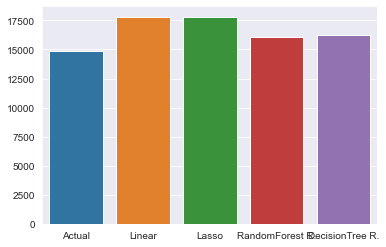

In [81]:
sns.set_style('darkgrid')

x = ['Actual','Linear', 'Lasso', 'RandomForest R.', 'DecisionTree R.']
y = [14835, 17820.01278294,17820.37363813, 16092.05839981,16288.66666667]

g = sns.barplot(x,y)
plt.show()

We performed a real-world example. We can conclude that our model performed very well on the test data, therefore it shows that our model is not over-fitted. Moreover, It can be seen that RandomForest Regression is the closest price and it performed best again.
- Actual = 14385 £
- RandomForest = 16092 £

### **6. Conclusions**

We applied 4 different ML prediction models to the dataset. We also did some tuning by trying different hyperparameters using grid search to compare to observe the changes on the result. Furthermore, we had 4 different best results from each ML model. 

- DecisionTree Regression: Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 100, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 1, 'splitter': 'random'}
- RandomForest Regression: Best Parameters: {'criterion': 'mse', 'max_depth': 100, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
- Linear Regresssion: Best Parameters: {'n_jobs': 1, 'normalize': True}
- Lasso Regression: Best Parameters: {'alpha': 0.0001, 'max_iter': 100, 'normalize': False}

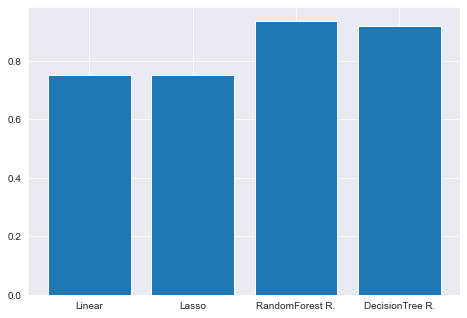

In [82]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['Linear', 'Lasso', 'RandomForest R.', 'DecisionTree R.']
r2_scores= [clf_lr.best_score_,clf_l.best_score_,clf_rf.best_score_,clf_dt.best_score_]
ax.bar(names,r2_scores)
plt.show()

We compared the models results with R2 score.

- DecisionTree Regression: R2 Score: 0.9211821040642386
- RandomForest Regression: R2 Score: 0.9380726448552817
- Linear Regresssion: R2 Score: 0.7520964536086595
- Lasso Regression: R2 Score: 0.752096363935429

The results also can be seen in the graph above.

In conclusion, We choose RandomForest Regression for ML model. Although, the time of the computation is quite longer than other models, It is clear that, it gave us the highest score.